In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import random
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown
plt.rcParams.update({'font.size':15})
from IPython.display import display, Markdown
import time as time

## Haynes-Shockley Computational

### 1D Random walk model for electron diffusion
As predicted dy the drude theory, electrons in a conductor act as a classical ideal gas. It is modelled that they. diffuse through the material from a high to low concentration with a Gaussian distribution, this can be modelled with a 1D random walk model.
A particle is able to either take 1 arbitrary step forwards or backwards, each with an equal probability of occurring. Analogous to a coin toss, the program will select 1 of 2 numbers at random (either 0 or 1) 1000 times. If the number is 0, one step back and vise versa. The simulation is run 100 times.

In [61]:
import random
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 1000, 1001)

def randomwalk(n):
    x = 0
    x_pos = [x]
    for _ in range(len(n)-1):
        step = random.randint(0,1)
        if step:
            x += 1
        else:
            x -= 1
        x_pos.append(x)
    return x_pos

iterations = 10000
final_positions = []

for _ in range(iterations):
    final_positions.append(randomwalk(n)[-1])

mean = np.mean(final_positions)
std = np.std(final_positions)

print(mean)
print(std)

-0.0254
31.352201754262808


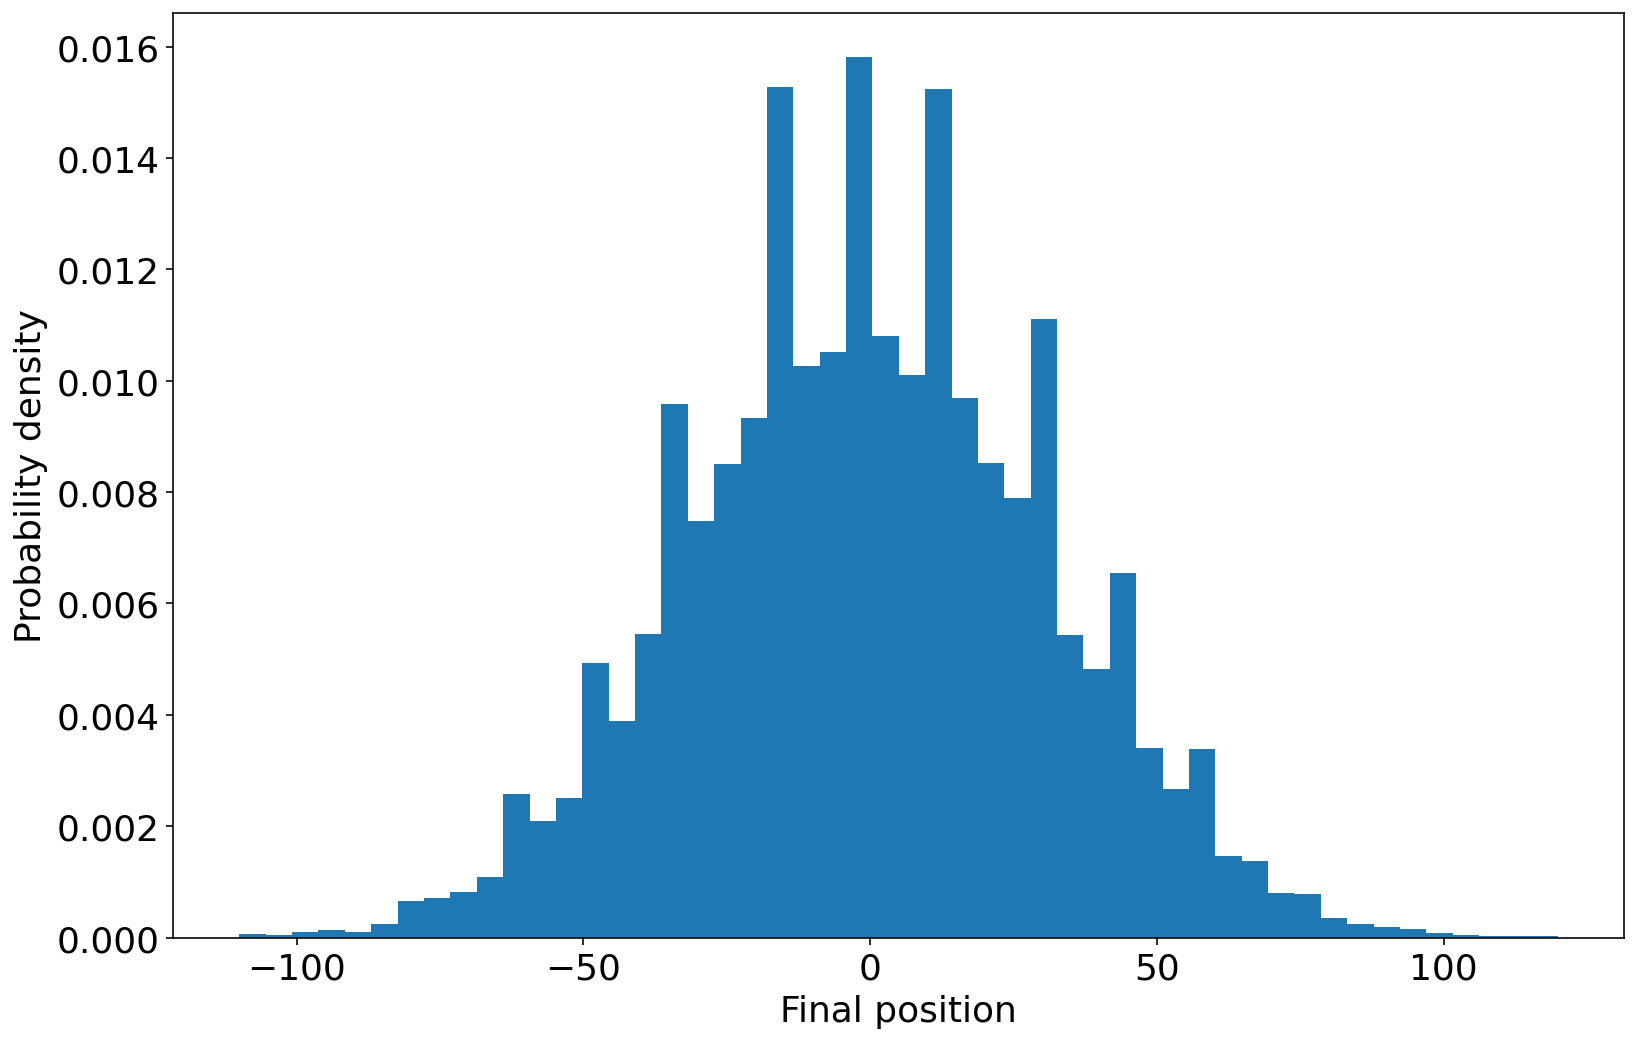

In [62]:
plt.hist(final_positions, bins=50, density=True)
plt.xlabel('Final position')
plt.ylabel('Probability density')
plt.savefig("Random walk distribution.png")
plt.show()

In [ ]:
# Create a colormap for the plots
cmap = plt.cm.get_cmap('binary')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the random walk for each iteration with a different color
for i in range(iterations):
    color = cmap(i / (iterations-1))
    ax.plot(n, tests[i], c=color, alpha=0.7)

# Add labels and tick parameters
ax.set_xlabel('Number of steps (n)', fontsize="18")
ax.set_ylabel('Distance from origin', fontsize="18")
ax.tick_params(direction='in', length=7)

plt.rcParams.update({'font.size': 18})
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)

'''# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Iterations x100')'''

plt.savefig('Random Walk.png')
plt.show()

The figure shows the path taken by a particle for the first 4 iterations of the random walk. If we normalise this and find a distribution, we get a Gaussian shape.

### Comparing data to computational

\begin{equation}
n_{mean}(x,t) = e^\frac{-t}{\tau}e^\frac{-(x-vt)^2}{4Dt}
\end{equation}


In [56]:
kB = 1.380649e-23
T = 300
q = 1.6e-19

mu = 1e-1
tau = 10e-6
D =  mu*kB*T/q 
V = 0.5 # voltage
E = V/ 950e-6 # Efield
v = E*mu

P = np.zeros([501,502])
x = np.linspace(-200e-6,550e-6,501)
t = np.linspace(tau/1000,tau/1.5,502)

#plot takes hole-electron recombination into account

for i in range (len(t)):
    for j in range (len(x)):
        P[j,i] = np.exp(-(x[j]-v*t[i])**2/(4*D*t[i]))*np.exp(-t[i]/tau)

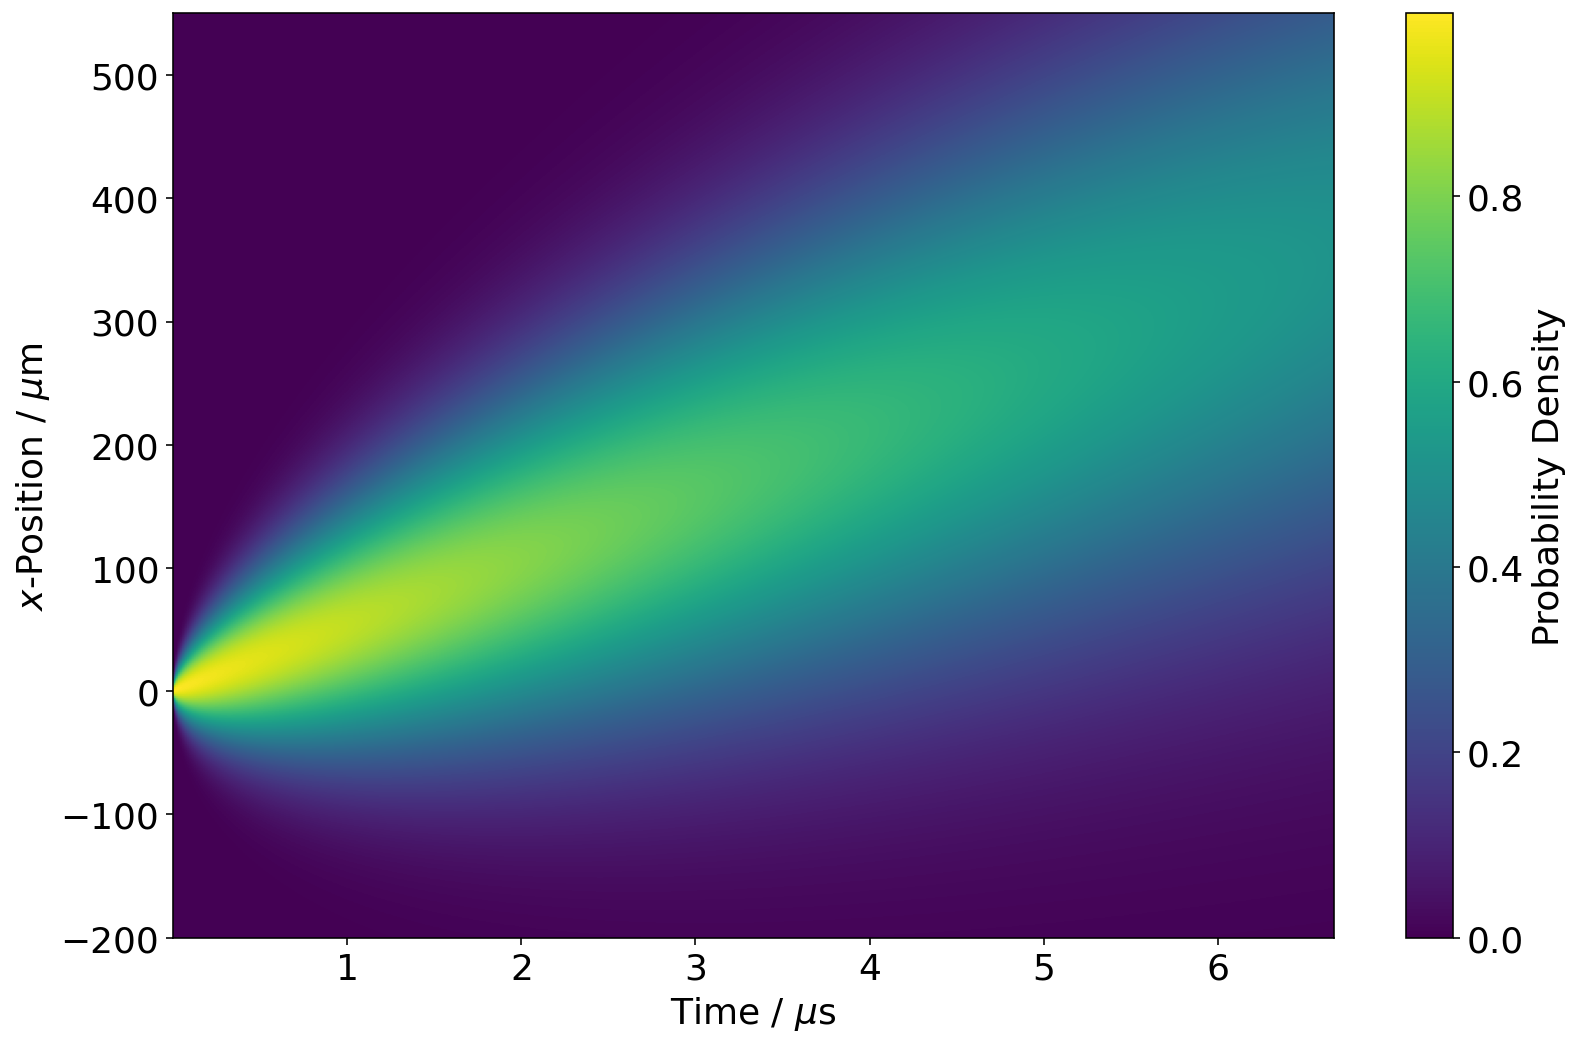

In [55]:
plt.rcParams.update({'font.size': 18})
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)        
ax.tick_params(direction='in', length=7)
     
plt.imshow(P,extent=[np.min(t),np.max(t)/1e-6,np.min(x)/1e-6,np.max(x)/1e-6],aspect='auto',origin='lower')
plt.xlabel('Time / $\mu$s', fontsize="18")
plt.ylabel('$x$-Position / $\mu$m', fontsize="18")

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Probability Density')

plt.savefig('Simulated results colormap.png')
plt.show()

In [34]:
def find_idx_nearest_val(array, value):
    idx_sorted = np.argsort(array)
    sorted_array = np.array(array[idx_sorted])
    idx = np.searchsorted(sorted_array, value, side="left")
    if idx >= len(array):
        idx_nearest = idx_sorted[len(array)-1]
    elif idx == 0:
        idx_nearest = idx_sorted[0]
    else:
        if abs(value - sorted_array[idx-1]) < abs(value - sorted_array[idx]):
            idx_nearest = idx_sorted[idx-1]
        else:
            idx_nearest = idx_sorted[idx]
    return idx_nearest

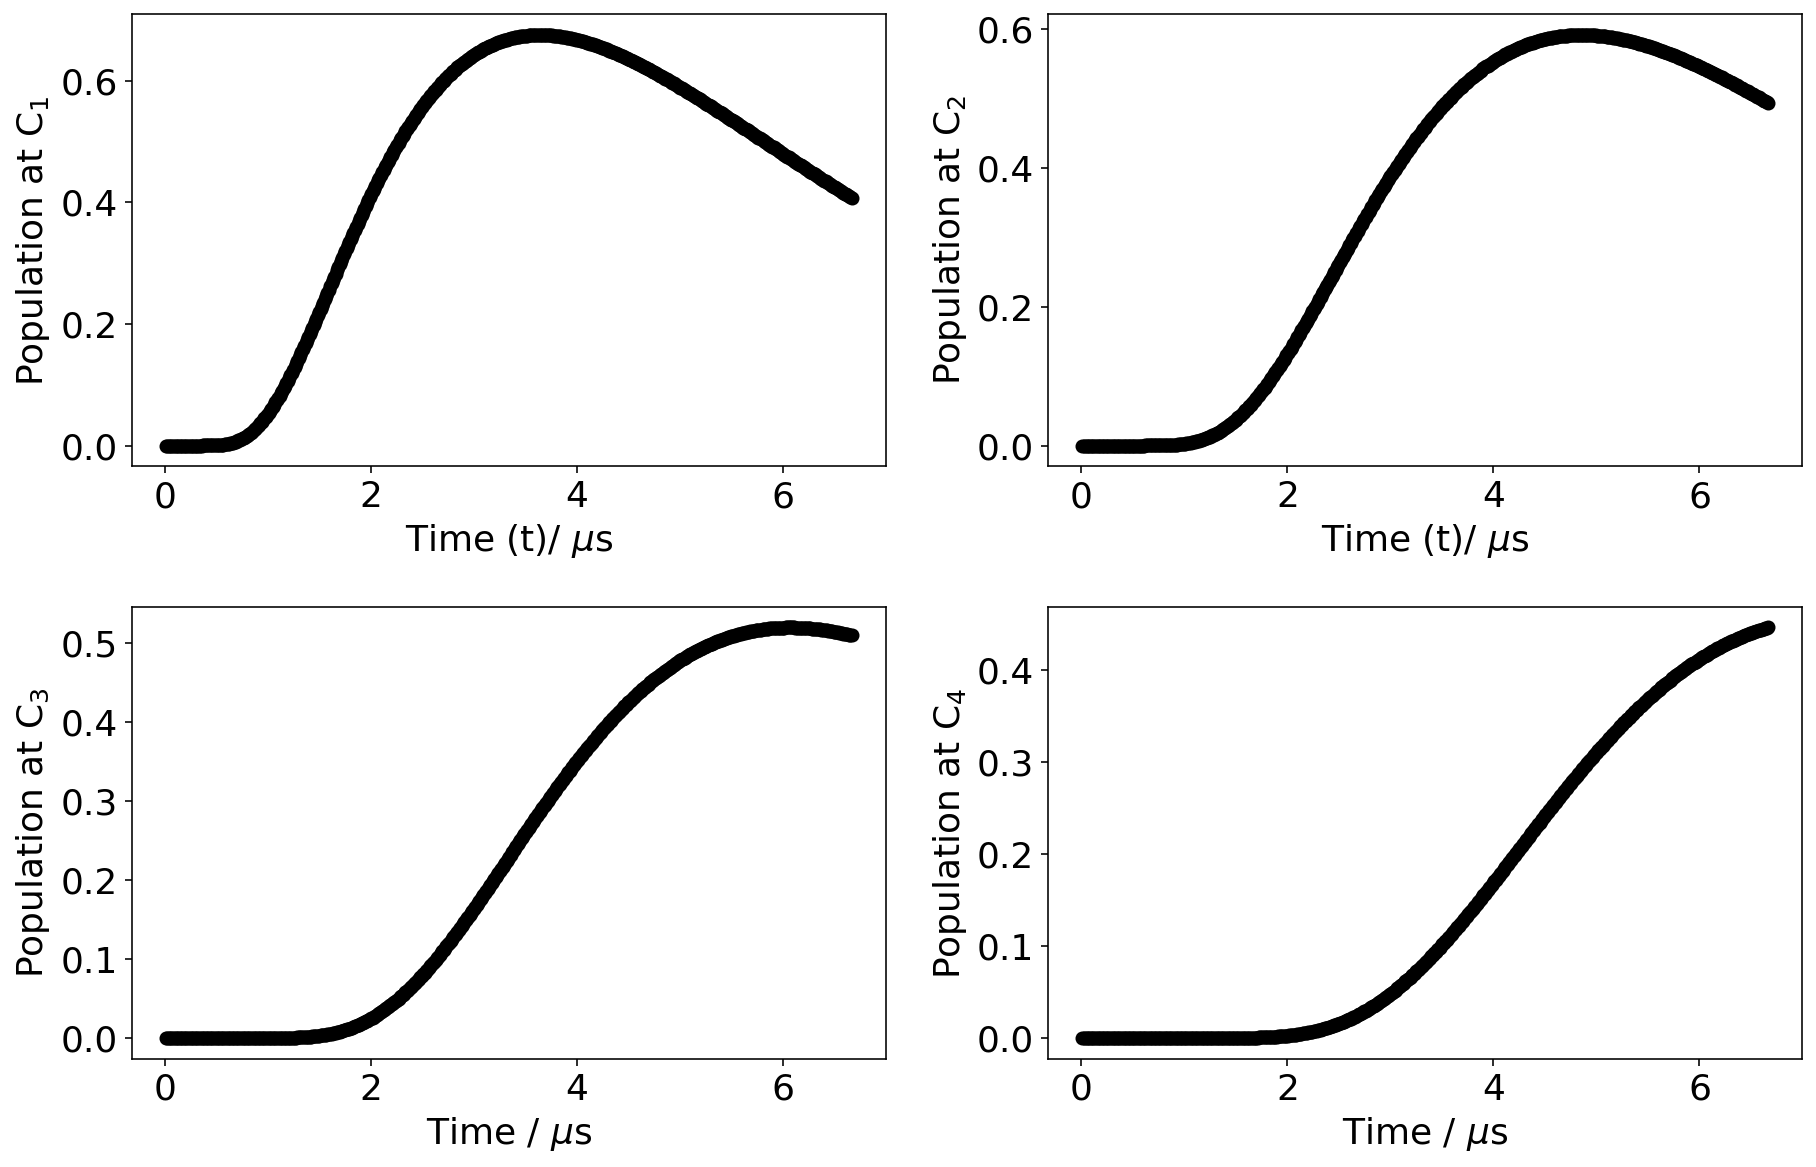

In [52]:
c1 = 225e-6
c2 = c1 + 75e-6
c3 = c2 + 75e-6
c4 = c3 + 75e-6

c1_index = find_idx_nearest_val(x,c1)
c2_index = find_idx_nearest_val(x,c2)
c3_index = find_idx_nearest_val(x,c3)
c4_index = find_idx_nearest_val(x,c4)

plt.rcParams['figure.figsize'] = [13, 8.5]
plt.rcParams.update({'font.size':18}) 

ax1 = plt.subplot(2,2,1) # a 2x2 grid of plots, with this one the 1st plot.
ax1.plot(t/1e-6,P[c1_index,:], 'ok', ls='-')
plt.xlabel('Time (t)/ $\mu$s', fontsize="18")
plt.ylabel('Population at C$_1$', fontsize="18")

ax1 = plt.subplot(2,2,2) 
ax1.plot(t/1e-6,P[c2_index,:], 'ok', ls='-')
plt.xlabel('Time (t)/ $\mu$s', fontsize="18")
plt.ylabel('Population at C$_2$',fontsize="18")

ax1 = plt.subplot(2,2,3) 
ax1.plot(t/1e-6,P[c3_index,:], 'ok', ls='-')
plt.xlabel('Time / $\mu$s', fontsize="18")
plt.ylabel('Population at C$_3$', fontsize="18")

ax1 = plt.subplot(2,2,4) 
ax1.plot(t/1e-6,P[c4_index,:], 'ok', ls='-')
plt.xlabel('Time / $\mu$s', fontsize="18")
plt.ylabel('Population at C$_4$', fontsize="18")

plt.tight_layout()

plt.savefig('Simlulated results each contact')
plt.show()

### Animation for presentation
I wouldn't run this unless you have a powerful PC, it will take a while otherwise.


This also won't work as I haven't updated it to work with the new simulations

In [ ]:
from matplotlib.animation import FuncAnimation

#parameters for animation
N = 1000
t_ini = tau/N
t_final = tau*1.5
dt = 1e-8
xmin = -300e-6
xmax = -xmin

x = np.arange(xmin, xmax, (xmax-xmin)/N)
fig, ax = plt.subplots(figsize=(22, 12))
ax.set_xlabel('Position x / $\mu$m', fontsize="18")
ax.set_ylabel('Minority charge population $n_mean$')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
ax.set_ylim(0, 50000)
ax.set_xlim(xmin,xmax)


def solution(t):
    P = (1/np.sqrt(4*np.pi*D*t))*np.exp(-x**2/(4*D*t))*np.exp(-t/tau)
    return P

def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    #ax.relim() # use if autoscale desired
   # ax.autoscale()
    return [plotLine,plotTitle]

ani = FuncAnimation(fig, func=animate, frames=np.arange(t_ini, tau*1.5+dt, dt), blit=True)
plt.show()
ani.save("gaussian.gif", fps=30)

https://stackoverflow.com/questions/54464350/matplotlib-animation-with-time-dependent-parameter